In [2]:
# import libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# list of FAANG stocks we'll be tracking, can be editeds
assets = ['MSFT','AMZN', 'AAPL', 'NFLX', 'GOOG']

In [4]:
# starting date (10 years ago)
start_date = '2012-01-01'

# ending date (today)
end_date = datetime.today().strftime('%Y-%m-%d')

In [5]:
# create an empty DataFrame with columns for each stock symbol
df = pd.DataFrame()

# retrieve and store the close prices into df
for stock in assets:
    data = yf.download(stock, start=start_date, end=end_date)
    df[stock] = data['Adj Close']

df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,MSFT,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-01-03,21.366358,8.951500,12.482926,10.320000,16.573130
2012-01-04,21.869190,8.875500,12.550013,11.492857,16.644611
2012-01-05,22.092667,8.880500,12.689339,11.328571,16.413727
2012-01-06,22.435867,9.130500,12.821992,12.327143,16.189817
2012-01-09,22.140566,8.928000,12.801654,14.025714,15.503389
...,...,...,...,...,...
2023-06-22,339.709991,130.149994,187.000000,422.480011,123.870003
2023-06-23,335.019989,129.330002,186.679993,424.019989,123.019997
2023-06-26,328.600006,127.330002,185.270004,415.940002,119.089996


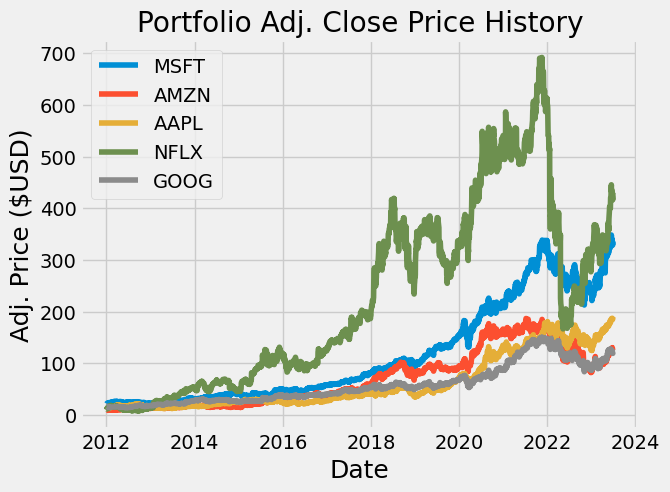

In [6]:
# visualize stock data
title = 'Portfolio Adj. Close Price History'

# get stocks
my_stocks = df

# create and plot data
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price ($USD)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [22]:
# display daily simple return
returns = df.pct_change()
returns

,MSFT,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.023534,-0.008490,0.005374,0.113649,0.004313
2012-01-05,0.010219,0.000563,0.011102,-0.014295,-0.013871
2012-01-06,0.015535,0.028152,0.010454,0.088146,-0.013642
2012-01-09,-0.013162,-0.022178,-0.001586,0.137791,-0.042399
...,...,...,...,...,...
2023-06-22,0.018437,0.042618,0.016525,-0.004641,0.021524
2023-06-23,-0.013806,-0.006300,-0.001711,0.003645,-0.006862
2023-06-26,-0.019163,-0.015464,-0.007553,-0.019056,-0.031946


In [21]:
# create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,MSFT,AMZN,AAPL,NFLX,GOOG
MSFT,0.070893,0.050094,0.045991,0.048601,0.047981
AMZN,0.050094,0.106729,0.045645,0.071783,0.053984
AAPL,0.045991,0.045645,0.083117,0.042983,0.043330
NFLX,0.048601,0.071783,0.042983,0.245326,0.052997
GOOG,0.047981,0.053984,0.043330,0.052997,0.073332


In [9]:
# assign weights to the stocks
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [20]:
from scipy.linalg import sqrtm

# handle missing values in covariance matrix
cov_matrix_annual[np.isnan(cov_matrix_annual)] = 0

# ensure positive definite covariance matrix
epsilon = 1e-6
cov_matrix_annual += epsilon * np.eye(cov_matrix_annual.shape[0])

# calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.0634474148647346

In [11]:
# calculate portfolio volatility / standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.2518873058824811

In [12]:
# calculate portfolio's simple annual return
port_simple_annual_return = np.sum(returns.mean() * weights) * 252
port_simple_annual_return

0.29963042813985136

In [13]:
# expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(port_simple_annual_return, 2) * 100) + '%'

print('Expected annual return: ' + percent_ret)
print('Annual volatility / risk: ' + percent_vols)
print('Annual variance: ' + percent_var)

Expected annual return: 30.0%
Annual volatility / risk: 25.0%
Annual variance: 6.0%


In [58]:
pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.4 MB/s eta 0:00:00


In [26]:
# import portfolio optimization libraries
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from sklearn import covariance

In [27]:
# calculate expected returns and covariance matrix
mu = expected_returns.mean_historical_return(df)
S = risk_models.CovarianceShrinkage(df).ledoit_wolf()

# optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('MSFT', 0.4436), ('AMZN', 0.06036), ('AAPL', 0.31262), ('NFLX', 0.18342), ('GOOG', 0.0)])
Expected annual return: 29.0%
Annual volatility: 24.9%
Sharpe Ratio: 1.09


(0.29049317573632877, 0.24897481354631665, 1.0864278674758765)

In [63]:
0.11466 + 0.56261 + 0.3151 + 0.00763

1.0